In [1]:
import pandas as pd
import numpy as np
import json
import datetime as dt
from datetime import datetime, date, time,timedelta
import pandas as pd
from csv import DictWriter
import urllib
import re,datetime
import os
import time
from os import walk
import re
import  gc

############
#INPUTS
#############

index = "BANKNIFTY"
index_file_path = "D:/Dispersion/Dispersion Data - 2016_2020/Banknifty - All Delta/BANKNIFTY.csv"

stfolder = "D:/Dispersion/Dispersion Data - 2016_2020/BN Dispersion - All Delta"
    
wgt_lot_path = "D:/Dispersion/Dispersion Data - 2021/BankNifty Weights/BN Mcap & includeok - Copy.csv"

direc = r"C:/Users/admin/Desktop/Dispersion Working Files - 16.22 - Only Dispersion-  Fut Hedge"

output_path = r"C:/Users/admin/Desktop/Dispersion output files check - 16.22 - Only Dispersion - Fut Hedge"

index_lotsize = 1

initial_equity = 100000

#########################
#Creating Stock List
#######################

filename = next(walk(stfolder), (None, None, []))[2]  # [] if no file
stock_list_path = []
for i in filename:
    temp = stfolder +"/"+ i
    stock_list_path.append(temp)

stock_list = []
for i in stock_list_path:
    stock_list.append(i.replace(".csv","").replace(stfolder + "/",""))
print(stock_list)
    
######################################    
#Creating weight and lot dictionary
######################################
"""
wgtlot_df = pd.read_csv(wgt_lot_path)
wgtlot_dict = wgtlot_df.set_index('Symbol').T.to_dict('list')
print(wgtlot_dict)
symbols = list(wgtlot_dict.keys())"""

### Now adding Columns for weights below

####################################

lookback_period = 15
std_dev = 2

#################
#EXPIRY DATES
####################
symbols = stock_list.copy()
symbols.append(index)

exp_file_path_weekly = "expiry_dates_custom_week_numbers.csv"
exp_df_weekly = pd.read_csv(exp_file_path_weekly,parse_dates = ["Weekly_Expiry_Date","Date"],dayfirst =True,usecols = ["Weekly_Expiry_Date","Date"])

exp_file_path_monthly = "expiry_dates.csv"
exp_df_monthly = pd.read_csv(exp_file_path_monthly,parse_dates = ["curr_exp_date","Date"],dayfirst =True,usecols = ["curr_exp_date","Date"])
#exp_df.rename({'curr_date': 'Date'}, axis=1, inplace=True)

['AXISBANK', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'CANBK', 'FEDERALBNK', 'HDFCBANK', 'ICICIBANK', 'IDFCFIRSTB', 'INDUSINDBK', 'KOTAKBANK', 'PNB', 'RBLBANK', 'SBIN', 'YESBANK']


In [2]:
idx = pd.read_csv(index_file_path,parse_dates = ["Date"],dayfirst = True)
df1 = idx[idx['Ticker'].str.endswith('- I')]
df2 = idx[idx['Ticker'].str.endswith('- II')]
df3 = idx[idx['Ticker'].str.endswith('- III')]

#no space between '-' & 'I' in weekly symbols

df4 = idx[idx['Ticker'].str.endswith('-I')]
df5 = idx[idx['Ticker'].str.endswith('-II')]
df6 = idx[idx['Ticker'].str.endswith('-III')]



index_file_path_monthly = direc + "/BANKNIFTY_MONTHLY.csv"

df1.to_csv(index_file_path_monthly)
df2.to_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_MONTHLY-II"))
df3.to_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_MONTHLY-III"))

df4.to_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_WEEKLY"))
df5.to_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_WEEKLY-II"))
df6.to_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_WEEKLY-III"))



print(idx.shape[0])
print(df1.shape[0]+df2.shape[0]+df3.shape[0], df4.shape[0]+df5.shape[0]+df6.shape[0])

    
for i in stock_list:
    df = pd.read_csv(stfolder + '/' + i + ".csv",parse_dates = ["Date"],dayfirst = True)
    df1 = df[df['Ticker'].str.endswith('- I')]
    df2 = df[df['Ticker'].str.endswith('- II')]
    df3 = df[df['Ticker'].str.endswith('- III')]
    
    path = direc + '/' + i + ".csv"
    
    df1.to_csv(path)
    df2.to_csv(path.replace(i,i+"-II"))
    df3.to_csv(path.replace(i,i+"-III"))
    
    print(df.shape[0])
    print(df1.shape[0]+df2.shape[0]+df3.shape[0])

stfolder = direc
print(index_file_path)

1486826
343290 471450
169540
169540
25538
25538
136480
136480
106465
106465
159450
159450
157490
157490
181844
181844
167624
167624
110306
110306
187784
187784
186026
186026
146610
146610
109058
109058
175724
175724
133296
133296
D:/Dispersion/Dispersion Data - 2016_2020/Banknifty - All Delta/BANKNIFTY.csv


In [3]:
####MONTHLY#####

idx = pd.read_csv(index_file_path_monthly,usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money","Delta"],parse_dates = ["Date"])

idx = pd.merge(idx, exp_df_monthly, on = 'Date', how = 'left')


idx_ce = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final_monthly = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final_monthly = final_monthly.T.drop_duplicates().T  #Drop Duplicates Columns

final_monthly = final_monthly.add_prefix(index +"_Monthly_")
final_monthly = final_monthly.sort_values(by=index +"_Monthly_"+'Date_CE')

final_monthly = final_monthly.rename(columns = {'BANKNIFTY_Monthly_Date_CE':'BANKNIFTY_Date_CE'})

final_monthly.to_csv(output_path+"/check-1data_monthly.csv")


####WEEKLY#####

idx = pd.read_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_WEEKLY"),usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money","Delta"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df_weekly, on = 'Date', how = 'left')

idx_ce = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_Weekly_")
final = final.sort_values(by=index +"_Weekly_"+'Date_CE')

final = final.rename(columns = {'BANKNIFTY_Weekly_Date_CE':'BANKNIFTY_Date_CE'})


final = pd.merge(final_monthly, final,how='left',on=index + '_Date_CE')
display('final_weekly_merged', final)


final.to_csv(output_path+"/check-1data_weekly.csv")


####STOCKS#####

for i in stock_list:
    print(i)
    df1 = pd.read_csv(stfolder+ '/' + i + ".csv",parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money","Delta"])


    df1 = pd.merge(df1, exp_df_monthly, on = 'Date', how = 'left')
    
    
    df_ce = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    print(df1.shape[0], df_ce.shape[0], df_pe.shape[0])
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
    
final = final.T.drop_duplicates().T
curr_final_df = final.copy()
u = curr_final_df.select_dtypes(exclude=['datetime'])
curr_final_df[u.columns] = u.fillna(0)

curr_final_df.to_csv(output_path+"/check-2data.csv")


'final_weekly_merged'

,BANKNIFTY_Date_CE,BANKNIFTY_Monthly_Ticker_CE,BANKNIFTY_Monthly_OPT_Close_CE,BANKNIFTY_Monthly_Strike_CE,BANKNIFTY_Monthly_IV_CE,BANKNIFTY_Monthly_Delta_CE,BANKNIFTY_Monthly_EQ_Close_CE,BANKNIFTY_Monthly_curr_exp_date_CE,BANKNIFTY_Monthly_Ticker_PE,BANKNIFTY_Monthly_OPT_Close_PE,...,BANKNIFTY_Weekly_OPT_Close_CE,BANKNIFTY_Weekly_Strike_CE,BANKNIFTY_Weekly_IV_CE,BANKNIFTY_Weekly_Delta_CE,BANKNIFTY_Weekly_EQ_Close_CE,BANKNIFTY_Weekly_Weekly_Expiry_Date_CE,BANKNIFTY_Weekly_Ticker_PE,BANKNIFTY_Weekly_OPT_Close_PE,BANKNIFTY_Weekly_IV_PE,BANKNIFTY_Weekly_Delta_PE
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.173,0.5568,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,0.5307,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,0.5565,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,0.5495,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,0.5135,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.8,30400.0,0.2049,0.52,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.05,...,2.1992,30400.0,0.0,1.0,30402.1992,2020-12-24,BANKNIFTYWeekly30400PE-I,0.05,5.0,0.0
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,0.5018,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2,...,309.05,30900.0,0.2796,0.5018,30880.9492,2020-12-31,BANKNIFTYWeekly30900PE-I,280.2,0.248,-0.4991
1230,2020-12-29,BANKNIFTY31300CE - I,279.2,31300.0,0.2849,0.5229,31322.5,2020-12-31,BANKNIFTY31300PE - I,216.55,...,279.2,31300.0,0.2849,0.5229,31322.5,2020-12-31,BANKNIFTYWeekly31300PE-I,216.55,0.2507,-0.4749
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,0.509,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.55,...,203.85,31300.0,0.3063,0.509,31303.0508,2020-12-31,BANKNIFTYWeekly31300PE-I,159.55,0.2497,-0.4902


AXISBANK
87551 1233 1233
BANDHANBNK
13417 209 209
BANKBARODA
70623 1233 1233
BANKINDIA
56466 960 960
CANBK
84081 1233 1233
FEDERALBNK
82837 1233 1233
HDFCBANK
94163 1233 1233
ICICIBANK
88596 1238 1238
IDFCFIRSTB
56797 1049 1049
INDUSINDBK
100015 1233 1233
KOTAKBANK
96309 1233 1233
PNB
76885 1233 1233
RBLBANK
56595 889 889
SBIN
91223 1233 1233
YESBANK
71212 1082 1082


In [4]:
###MONTHLY#####

idx = pd.read_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_MONTHLY-II"),usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money", "Delta"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df_monthly, on = 'Date', how = 'left')


idx_ce = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final_monthly = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final_monthly = final_monthly.T.drop_duplicates().T  #Drop Duplicates Columns

final_monthly = final_monthly.add_prefix(index +"_Monthly_")
final_monthly = final_monthly.sort_values(by=index +"_Monthly_"+'Date_CE')
final_monthly = final_monthly.rename(columns = {'BANKNIFTY_Monthly_Date_CE':'BANKNIFTY_Date_CE'})

final_monthly.to_csv(output_path+"/check-3data_monthly.csv")

###WEEKLY#####

idx = pd.read_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_WEEKLY-II"),usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money", "Delta"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df_weekly, on = 'Date', how = 'left')


idx_ce = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_Weekly_")
final = final.sort_values(by=index +"_Weekly_"+'Date_CE')
final = final.rename(columns = {'BANKNIFTY_Weekly_Date_CE':'BANKNIFTY_Date_CE'})


final = pd.merge(final_monthly, final,how='left',on=index + '_Date_CE')

final.to_csv(output_path+"/check-3data_weekly.csv")




for i in stock_list:
    print(i)
    path  = stfolder+ '/' + i + ".csv"
    df1 = pd.read_csv(path.replace(i,i+"-II"),parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money", "Delta"])
    df1 = pd.merge(df1, exp_df_monthly, on = 'Date', how = 'left')

    
    df_ce = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    
    
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
final = final.T.drop_duplicates().T
next_final_df = final.copy()

next_final_df.to_csv(output_path+"/check-4.0data.csv")


u = next_final_df.select_dtypes(exclude=['datetime'])
next_final_df[u.columns] = u.fillna(0)

next_final_df.to_csv(output_path+"/check-4data.csv")


AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK


In [5]:
####MONTHLY####

replacedf = curr_final_df[curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_Monthly_curr_exp_date_CE"]]
restdf = curr_final_df[~(curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_Monthly_curr_exp_date_CE"])]

nextdf = next_final_df[next_final_df[index + "_Date_CE"] == next_final_df[index + "_Monthly_curr_exp_date_CE"]]


print(replacedf.shape[0])

print(restdf.shape[0])
print(nextdf.shape[0])
print(next_final_df.shape[0])


for i in symbols:
    if i == index:
        if nextdf.shape[0] == replacedf.shape[0]:
            replacedf[i+"_Monthly_IV_CE"] = nextdf[i+"_Monthly_IV_CE"]
            replacedf[i+"_Monthly_IV_PE"] = nextdf[i+"_Monthly_IV_PE"]
            
            print("EXCHANGE DONE")
        else:
            print("Entries Missing Error")
            break
    else:
        if nextdf.shape[0] == replacedf.shape[0]:
            replacedf[i+"_IV_CE"] = nextdf[i+"_IV_CE"]
            replacedf[i+"_IV_PE"] = nextdf[i+"_IV_PE"]
            print("EXCHANGE DONE")
        else:
            print("Entries Missing Error")
            break
        

final = restdf.append(replacedf).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])


####WEEKLY####

replacedfweekly = final[final[index + "_Date_CE"] == final[index + "_Weekly_Weekly_Expiry_Date_CE"]]
restdfweekly = final[~(final[index + "_Date_CE"] == final[index + "_Weekly_Weekly_Expiry_Date_CE"])]

nextdfweekly = next_final_df[next_final_df[index + "_Date_CE"] == next_final_df[index + "_Weekly_Weekly_Expiry_Date_CE"]]

for i in symbols:
    if i == index:
        if nextdf.shape[0] == replacedf.shape[0]:
            replacedfweekly[i+"_Weekly_IV_CE"] = nextdfweekly[i+"_Weekly_IV_CE"]
            replacedfweekly[i+"_Weekly_IV_PE"] = nextdfweekly[i+"_Weekly_IV_PE"]
            print("EXCHANGE DONE")
        else:
            print("Entries Missing Error")
            break
    else:
        continue
        
final = restdfweekly.append(replacedfweekly).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])


60
1173
60
1233
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE


<ipython-input-5-78234121b40a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i+"_IV_CE"] = nextdf[i+"_IV_CE"]
<ipython-input-5-78234121b40a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i+"_IV_PE"] = nextdf[i+"_IV_PE"]
<ipython-input-5-78234121b40a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [6]:
final.to_csv(output_path+"\Part-1data.csv")
data = pd.read_csv(output_path+"\Part-1data.csv",parse_dates = [index + "_Date_CE"],dayfirst = True)

In [7]:
#Adding Avg IV Columns
#Considering only monthly IV for index to calculate implied ratio

data[index + "_Monthly_Avg IV"] = (data[index + "_Monthly_IV_CE"] + data[index + "_Monthly_IV_PE"])/2
curr_final_df[index + "_Monthly_Avg IV"] = data[index + "_Monthly_Avg IV"]
for i in stock_list:
    data[i + "_Avg IV"] = (data[i + "_IV_CE"] + data[i + "_IV_PE"])/2
    curr_final_df[i + "_Avg IV"] = data[i + "_Avg IV"]
data = curr_final_df.copy()

# Adding Weights Columns

In [8]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date","includeok","Lotsize"])

In [9]:
grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Weightage"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

display(data)

<ipython-input-9-021f4af53298>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Weightage"]
<ipython-input-9-021f4af53298>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]


7750
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


,BANKNIFTY_Date_CE,BANKNIFTY_Monthly_Ticker_CE,BANKNIFTY_Monthly_OPT_Close_CE,BANKNIFTY_Monthly_Strike_CE,BANKNIFTY_Monthly_IV_CE,BANKNIFTY_Monthly_Delta_CE,BANKNIFTY_Monthly_EQ_Close_CE,BANKNIFTY_Monthly_curr_exp_date_CE,BANKNIFTY_Monthly_Ticker_PE,BANKNIFTY_Monthly_OPT_Close_PE,...,FEDERALBNK_OG_Weight,HDFCBANK_OG_Weight,ICICIBANK_OG_Weight,IDFCFIRSTB_OG_Weight,INDUSINDBK_OG_Weight,KOTAKBANK_OG_Weight,PNB_OG_Weight,RBLBANK_OG_Weight,SBIN_OG_Weight,YESBANK_OG_Weight
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,0.5568,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,...,0.96,26.83,14.92,NaN,5.58,13.01,2.25,NaN,17.26,3.00
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,0.5307,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,...,0.96,27.11,14.90,NaN,5.56,12.96,2.22,NaN,17.18,2.97
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,0.5565,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,...,0.97,27.03,15.03,NaN,5.59,13.07,2.19,NaN,17.03,2.99
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,0.5495,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,...,0.96,27.30,14.73,NaN,5.68,13.06,2.18,NaN,17.06,2.99
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,0.5135,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,...,0.94,27.70,14.90,NaN,5.71,13.16,2.14,NaN,16.89,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,0.5200,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,...,0.60,35.40,16.31,0.94,2.97,17.86,1.52,0.61,10.96,NaN
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,0.5018,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,...,0.61,35.25,16.26,0.95,2.97,17.84,1.54,0.62,11.13,NaN
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,0.5229,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,...,0.60,35.16,16.33,0.93,3.09,17.71,1.56,0.62,11.09,NaN
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,0.5090,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,...,0.60,35.27,16.32,0.93,3.04,17.87,1.53,0.62,11.05,NaN


### Adding Final Weight Columns

In [10]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [11]:
u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

,BANKNIFTY_Date_CE,BANKNIFTY_Monthly_Ticker_CE,BANKNIFTY_Monthly_OPT_Close_CE,BANKNIFTY_Monthly_Strike_CE,BANKNIFTY_Monthly_IV_CE,BANKNIFTY_Monthly_Delta_CE,BANKNIFTY_Monthly_EQ_Close_CE,BANKNIFTY_Monthly_curr_exp_date_CE,BANKNIFTY_Monthly_Ticker_PE,BANKNIFTY_Monthly_OPT_Close_PE,...,HDFCBANK_Final_Weight,ICICIBANK_Final_Weight,IDFCFIRSTB_Final_Weight,INDUSINDBK_Final_Weight,KOTAKBANK_Final_Weight,PNB_Final_Weight,RBLBANK_Final_Weight,SBIN_Final_Weight,YESBANK_Final_Weight,BANKNIFTY_Final_Weight
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,0.5568,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,...,0.268273,0.149185,0.000000,0.055794,0.130087,0.022498,0.000000,0.172583,0.029997,1
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,0.5307,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,...,0.271127,0.149015,0.000000,0.055606,0.129613,0.022202,0.000000,0.171817,0.029703,1
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,0.5565,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,...,0.270327,0.150315,0.000000,0.055906,0.130713,0.021902,0.000000,0.170317,0.029903,1
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,0.5495,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,...,0.273000,0.147300,0.000000,0.056800,0.130600,0.021800,0.000000,0.170600,0.029900,1
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,0.5135,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,...,0.277000,0.149000,0.000000,0.057100,0.131600,0.021400,0.000000,0.168900,0.029600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,0.5200,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,...,0.354000,0.163100,0.009400,0.029700,0.178600,0.015200,0.006100,0.109600,0.000000,1
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,0.5018,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,...,0.352465,0.162584,0.009499,0.029697,0.178382,0.015398,0.006199,0.111289,0.000000,1
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,0.5229,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,...,0.351635,0.163316,0.009301,0.030903,0.177118,0.015602,0.006201,0.110911,0.000000,1
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,0.5090,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,...,0.352735,0.163216,0.009301,0.030403,0.178718,0.015302,0.006201,0.110511,0.000000,1


In [12]:
data['index_iv'] = data[index +'_Monthly_Avg IV']*100
data['stock_iv']  = 0
for i in stock_list:
    data['stock_iv'] += data[i + '_Avg IV']*data[i + "_Final_Weight"] 
    
data['implied_correl'] = (data['index_iv']/data['stock_iv'])

print(data.isnull().sum().sum())

4050


In [13]:
data['avg'] = data['implied_correl'].rolling(lookback_period).mean()
df = data.copy()

df.to_csv(output_path+'/impliedratio.csv')

In [14]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * std_dev # Calculate top band
    bollinger_down = sma - std * std_dev # Calculate bottom band
    return bollinger_up, bollinger_down

df['bollinger_up'], df['bollinger_down'] = get_bollinger_bands(df['implied_correl'], lookback_period)

df['sma'] = get_sma(df['implied_correl'], lookback_period)
df['long_avg'] = df['implied_correl'].mean()


#print(df['bollinger_up'])
#print(df['bollinger_down'])
#print(df['long_avg'])
#print(df['sma'])

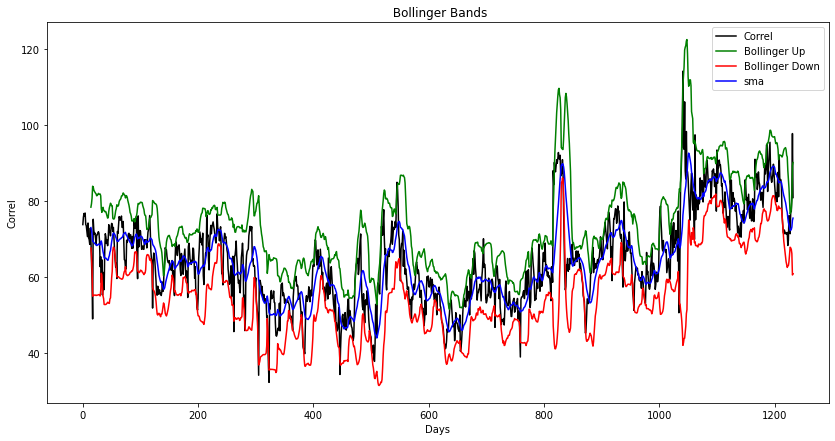

In [15]:
import matplotlib.pyplot as plt

df.head()

fig = plt.figure(figsize=(14,7))
plt.title(' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Correl')
plt.plot(df['implied_correl'], label='Correl', c = 'black')
plt.plot(df['bollinger_up'], label='Bollinger Up', c='g')
plt.plot(df['bollinger_down'], label='Bollinger Down', c='r')
plt.plot(df['sma'], label='sma', c='b')

plt.legend()
plt.show()

In [16]:
df.to_csv(output_path+"\series.csv")

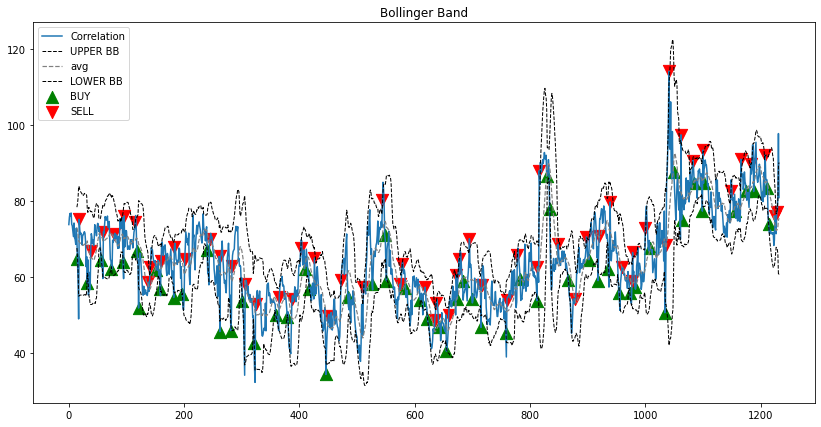

In [17]:
def implement_bb_strategy(data, lower_bb, upper_bb, avg):
    entry_ratio = []
    exit_ratio = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if(i==0):
            if data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            elif data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(0)
        else:
            if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] > avg[i-1] and data[i] < avg[i]:
                if signal != 0:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])                
            
            elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] < avg[i-1] and data[i] > avg[i]:
                if signal != 0:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(bb_signal[i-1])

    return entry_ratio, exit_ratio, bb_signal

df['entry_ratio'], df['exit_ratio'], df['bb_signal'] = implement_bb_strategy(df['implied_correl'], df['bollinger_down'], df['bollinger_up'], df['avg'])

fig = plt.figure(figsize=(14,7))


df['implied_correl'].plot(label = 'Correlation', alpha = 1)
df['bollinger_up'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['avg'].plot(label = 'avg', linestyle = '--', linewidth = 1.2, color = 'grey')
df['bollinger_down'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, df['entry_ratio'], marker = '^', color = 'green', label = 'BUY', s = 150)
plt.scatter(df.index, df['exit_ratio'], marker = 'v', color = 'red', label = 'SELL', s = 150)
plt.title('Bollinger Band')
plt.legend(loc = 'upper left')
plt.show()


In [18]:
df1 = df.copy()

In [19]:
# df1['dispersion_entry'] = (df1['bb_signal'] == -1) & (df1['exit_ratio'] > 0)  & (df1['entry_ratio'].isna() == True)
# df1['dispersion_exit'] = (df1['bb_signal'] == 0) & (df1['entry_ratio'] > 0) & (df1['entry_ratio'].isna() == False)

# df1['correlation_entry'] = (df1['bb_signal'] == 1) & (df1['entry_ratio'] > 0)  & (df1['exit_ratio'].isna() == True)
# df1['correlation_exit'] = (df1['bb_signal'] == 0)  & (df1['exit_ratio'] > 0)  & (df1['exit_ratio'].isna() == False)

df1['dispersion_entry'] = np.nan
df1['dispersion_exit'] = np.nan
df1['bb_signal'] = np.nan

df1['correlation_entry'] = False
df1['correlation_exit'] = False

df1['bb_signal'] = df1.apply(lambda x: 0 if x['BANKNIFTY_Date_CE']==x['BANKNIFTY_Weekly_Weekly_Expiry_Date_CE'] else -1, axis=1)



for i in range(len(df1)):
    if(i==0):
        continue
    elif (df1.loc[i-1,'BANKNIFTY_Date_CE'] == df1.loc[i-1,'BANKNIFTY_Weekly_Weekly_Expiry_Date_CE']):  
        df1.loc[i,'dispersion_entry'] = True
        df1.loc[i,'dispersion_exit'] = False
    elif (df1.loc[i,'BANKNIFTY_Date_CE'] == df1.loc[i,'BANKNIFTY_Weekly_Weekly_Expiry_Date_CE']):
        df1.loc[i,'dispersion_entry'] = False
        df1.loc[i,'dispersion_exit'] = True
    else:
        df1.loc[i,'dispersion_entry'] = False
        df1.loc[i,'dispersion_exit'] = False

display(df1)          



,BANKNIFTY_Date_CE,BANKNIFTY_Monthly_Ticker_CE,BANKNIFTY_Monthly_OPT_Close_CE,BANKNIFTY_Monthly_Strike_CE,BANKNIFTY_Monthly_IV_CE,BANKNIFTY_Monthly_Delta_CE,BANKNIFTY_Monthly_EQ_Close_CE,BANKNIFTY_Monthly_curr_exp_date_CE,BANKNIFTY_Monthly_Ticker_PE,BANKNIFTY_Monthly_OPT_Close_PE,...,bollinger_down,sma,long_avg,entry_ratio,exit_ratio,bb_signal,dispersion_entry,dispersion_exit,correlation_entry,correlation_exit
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,0.5568,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,...,NaN,NaN,64.428187,NaN,NaN,-1,NaN,NaN,False,False
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,0.5307,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,...,NaN,NaN,64.428187,NaN,NaN,-1,False,False,False,False
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,0.5565,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,...,NaN,NaN,64.428187,NaN,NaN,-1,False,False,False,False
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,0.5495,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,...,NaN,NaN,64.428187,NaN,NaN,-1,False,False,False,False
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,0.5135,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,...,NaN,NaN,64.428187,NaN,NaN,-1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,0.5200,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,...,67.627833,72.273736,64.428187,NaN,77.117174,0,False,True,False,False
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,0.5018,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,...,67.232562,72.495861,64.428187,NaN,NaN,-1,True,False,False,False
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,0.5229,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,...,66.150468,73.146637,64.428187,NaN,NaN,-1,False,False,False,False
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,0.5090,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,...,60.495897,74.910501,64.428187,NaN,NaN,-1,False,False,False,False


In [20]:
df2 = df1.copy()

# df2.to_csv(output_path + '/ccccc.csv')

# df2_index = df2.index
# exp_dates_monthly = list(df2_index[df2[index + "_Monthly_curr_exp_date_CE"] == df2[index+"_Date_CE"]])
# exp_dates_weekly = list(df2_index[df2[index + "_Weekly_Weekly_Expiry_Date_CE"] == df2[index+"_Date_CE"]])

# print('exp_dates_monthly',exp_dates_monthly)
# print('exp_dates_weekly',exp_dates_weekly)

# for i in exp_dates_monthly:
#     if df2.iloc[i]["bb_signal"] == -1:
#         if df2.loc[i, 'dispersion_entry'] == True:
#             continue
#         else:
#             df2.loc[i,'dispersion_entry'] = False
#             df2.loc[i,'dispersion_exit'] = True
#             df2.loc[i,'correlation_entry'] = False
#             df2.loc[i,'correlation_exit'] = False
#             df2.loc[i,'bb_signal'] = 0
#             df2.loc[i,'entry_ratio'] = df2.iloc[i]["implied_correl"]
#         try:
#             if df2.loc[i+1, 'dispersion_exit'] == True:
#                 df2.loc[i+1,'dispersion_entry'] = False
#                 df2.loc[i+1,'dispersion_exit'] = False
#                 df2.loc[i+1,'correlation_entry'] = False
#                 df2.loc[i+1,'correlation_exit'] = False

#             else:
#                 df2.loc[i+1,'dispersion_entry'] = True
#                 df2.loc[i+1,'dispersion_exit'] = False
#                 df2.loc[i+1,'correlation_entry'] = False
#                 df2.loc[i+1,'correlation_exit'] = False
#                 df2.loc[i+1,'bb_signal'] = -1
#                 df2.loc[i+1,'exit_ratio'] = df2.iloc[i+1]["implied_correl"]
#         except Exception as e:
#             print(e)
#             continue
            
#     elif df2.iloc[i]["bb_signal"] == 1:
#         if df2.loc[i, 'correlation_entry'] == True:
#             continue
#         else:
#             df2.loc[i,'dispersion_entry'] = False
#             df2.loc[i,'dispersion_exit'] = False
#             df2.loc[i,'correlation_entry'] = False
#             df2.loc[i,'correlation_exit'] = True
#             df2.loc[i,'bb_signal'] = 0
#             df2.loc[i,'entry_ratio'] = df2.iloc[i]["implied_correl"]
#         if df2.loc[i+1, 'correlation_exit'] == True:
#             df2.loc[i+1,'dispersion_entry'] = False
#             df2.loc[i+1,'dispersion_exit'] = False
#             df2.loc[i+1,'correlation_entry'] = False
#             df2.loc[i+1,'correlation_exit'] = False
#         else:
#             df2.loc[i+1,'dispersion_entry'] = False
#             df2.loc[i+1,'dispersion_exit'] = False
#             df2.loc[i+1,'correlation_entry'] = True
#             df2.loc[i+1,'correlation_exit'] = False
#             df2.loc[i+1,'bb_signal'] = 1
#             df2.loc[i+1,'exit_ratio'] = df2.iloc[i+1]["implied_correl"]
        
#     elif df2.iloc[i]["bb_signal"] == 0:
#         continue


# for i in exp_dates_weekly:        
#     if df2.iloc[i]["bb_signal"] == -1:
#         if df2.loc[i, 'dispersion_entry'] == True:
#             continue
#         else:
#             df2.loc[i,'dispersion_entry'] = False
#             df2.loc[i,'dispersion_exit'] = True
#             df2.loc[i,'correlation_entry'] = False
#             df2.loc[i,'correlation_exit'] = False
#             df2.loc[i,'bb_signal'] = 0
#             df2.loc[i,'entry_ratio'] = df2.iloc[i]["implied_correl"]
#         try:

#             if df2.loc[i+1, 'dispersion_exit'] == True:
#                 continue
#             else:
#                 df2.loc[i+1,'dispersion_entry'] = True
#                 df2.loc[i+1,'dispersion_exit'] = False
#                 df2.loc[i+1,'correlation_entry'] = False
#                 df2.loc[i+1,'correlation_exit'] = False
#                 df2.loc[i+1,'bb_signal'] = -1
#                 df2.loc[i+1,'exit_ratio'] = df2.iloc[i+1]["implied_correl"]
#         except Exception as e:
#             print(e)
#             continue
#     elif df2.iloc[i]["bb_signal"] == 1:
#         continue
#     elif df2.iloc[i]["bb_signal"] == 0:
#         continue

        
        

df = df2[ (df2["dispersion_entry"] == True) | (df2["correlation_exit"] == True) | 
              (df2["dispersion_exit"] == True) | (df2["correlation_entry"] == True) ].reset_index()

df2.to_csv(output_path + '/with entry exit signals_all data.csv')

In [21]:
df = df2[ (df2["dispersion_entry"] == True) | (df2["correlation_exit"] == True) | 
              (df2["dispersion_exit"] == True) | (df2["correlation_entry"] == True) ].reset_index()


df.to_csv(output_path + '/with entry exit signals.csv')

In [22]:
trades = []

for i in df.index[:-1]:
    if df["bb_signal"][i] == -1:
        strikes = {}
        strikes[index] = df[index + "_Weekly_Strike_CE"][i]
        for j in stock_list:
            strikes[j] = df[j+"_Strike_CE"][i]
        trades.append( 
                        { 
                          "entry_date": df[index + "_Date_CE"][i],
                          "exit_date" : df[index + "_Date_CE"][i+1],
                          "expiry_date" : df[index+"_Weekly_Weekly_Expiry_Date_CE"][i],
                          "type_of_trade": "SILS",
                          "strike" : strikes,
                          "entry_ratio" : df["exit_ratio"][i],
                          "exit_ratio" : df["entry_ratio"][i+1],
                            
                        }
                      )
                            
    if df["bb_signal"][i] == 1:
            strikes = {}
            strikes[index] = df[index + "_Monthly_Strike_CE"][i]
            for j in stock_list:
                strikes[j] = df[j+"_Strike_CE"][i]
            trades.append( 
                            { 
                              "entry_date": df[index + "_Date_CE"][i],
                              "exit_date" : df[index + "_Date_CE"][i+1],
                              "expiry_date" : df[index+"_Monthly_curr_exp_date_CE"][i],
                              "type_of_trade": "LISS",
                              "strike" : strikes,
                              "entry_ratio" : df["entry_ratio"][i],
                              "exit_ratio" : df["exit_ratio"][i+1],
                            }
                          )

In [23]:
for i in trades:
    date1 = i["entry_date"]
    date2 = i["exit_date"]
    expiry = i["expiry_date"]
    trade = i["type_of_trade"]
    print(date1)
    print(date2)
    
    if expiry == date1:
        if trade == "SILS":
            df = pd.read_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_WEEKLY"),parse_dates = ["Date"])
            nextdf = pd.read_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_WEEKLY-II"),parse_dates = ["Date"])

            df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
            nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][index])]
            nextdf = nextdf.append(df)
            nextdf = pd.merge(nextdf, exp_df_weekly, on = 'Date', how = 'left')
            df_dict = {}
            df_dict[index] = nextdf
        elif trade == "LISS":
            df = pd.read_csv(index_file_path_monthly,parse_dates = ["Date"])
            nextdf = pd.read_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_MONTHLY-II"),parse_dates = ["Date"])

            df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
            nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][index])]
            nextdf = nextdf.append(df)
            nextdf = pd.merge(nextdf, exp_df_monthly, on = 'Date', how = 'left')
            df_dict = {}
            df_dict[index] = nextdf
        else:
            print("trade_type_error")
            break

        for j in stock_list:
            path = stfolder + '/' + j + ".csv"
            df = pd.read_csv(path,parse_dates = ["Date"])
            nextdf = pd.read_csv(path.replace(j,j+"-II"),parse_dates = ["Date"])
        
            df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
            nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][j])]
            nextdf = nextdf.append(df)
            nextdf = pd.merge(nextdf, exp_df_monthly, on = 'Date', how = 'left')
            df_dict[j] = nextdf
        i["dataframes"] = df_dict
    
    else:
        if trade == "SILS":
            df = pd.read_csv(index_file_path_monthly.replace("BANKNIFTY_MONTHLY","BANKNIFTY_WEEKLY"),parse_dates = ["Date"])
            df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
            df = pd.merge(df, exp_df_weekly, on = 'Date', how = 'left')
            df_dict = {}
            df_dict[index] = df

        elif trade == "LISS":
            df = pd.read_csv(index_file_path_monthly,parse_dates = ["Date"])
            df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
            df = pd.merge(df, exp_df_monthly, on = 'Date', how = 'left')
            df_dict = {}
            df_dict[index] = df
            
        else:
            print("trade_type_error")
            break

        for j in stock_list:
            df = pd.read_csv(stfolder + '/' + j + ".csv",parse_dates = ["Date"])
            df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
            df = pd.merge(df, exp_df_monthly, on = 'Date', how = 'left')
            df_dict[j] = df
        i["dataframes"] = df_dict

2016-06-03 00:00:00
2016-06-09 00:00:00
2016-06-10 00:00:00
2016-06-16 00:00:00
2016-06-17 00:00:00
2016-06-23 00:00:00
2016-06-24 00:00:00
2016-06-30 00:00:00
2016-07-01 00:00:00
2016-07-07 00:00:00
2016-07-08 00:00:00
2016-07-14 00:00:00
2016-07-15 00:00:00
2016-07-21 00:00:00
2016-07-22 00:00:00
2016-07-28 00:00:00
2016-07-29 00:00:00
2016-08-04 00:00:00
2016-08-05 00:00:00
2016-08-11 00:00:00
2016-08-12 00:00:00
2016-08-18 00:00:00
2016-08-19 00:00:00
2016-08-25 00:00:00
2016-08-26 00:00:00
2016-09-01 00:00:00
2016-09-02 00:00:00
2016-09-08 00:00:00
2016-09-09 00:00:00
2016-09-15 00:00:00
2016-09-16 00:00:00
2016-09-22 00:00:00
2016-09-23 00:00:00
2016-09-29 00:00:00
2016-09-30 00:00:00
2016-10-06 00:00:00
2016-10-07 00:00:00
2016-10-13 00:00:00
2016-10-14 00:00:00
2016-10-20 00:00:00
2016-10-21 00:00:00
2016-10-27 00:00:00
2016-10-28 00:00:00
2016-11-03 00:00:00
2016-11-04 00:00:00
2016-11-10 00:00:00
2016-11-11 00:00:00
2016-11-17 00:00:00
2016-11-18 00:00:00
2016-11-24 00:00:00


2020-05-08 00:00:00
2020-05-14 00:00:00
2020-05-15 00:00:00
2020-05-21 00:00:00
2020-05-22 00:00:00
2020-05-28 00:00:00
2020-05-29 00:00:00
2020-06-04 00:00:00
2020-06-05 00:00:00
2020-06-11 00:00:00
2020-06-12 00:00:00
2020-06-18 00:00:00
2020-06-19 00:00:00
2020-06-25 00:00:00
2020-06-26 00:00:00
2020-07-02 00:00:00
2020-07-03 00:00:00
2020-07-09 00:00:00
2020-07-10 00:00:00
2020-07-16 00:00:00
2020-07-17 00:00:00
2020-07-23 00:00:00
2020-07-24 00:00:00
2020-07-30 00:00:00
2020-07-31 00:00:00
2020-08-06 00:00:00
2020-08-07 00:00:00
2020-08-13 00:00:00
2020-08-14 00:00:00
2020-08-20 00:00:00
2020-08-21 00:00:00
2020-08-27 00:00:00
2020-08-28 00:00:00
2020-09-03 00:00:00
2020-09-04 00:00:00
2020-09-10 00:00:00
2020-09-11 00:00:00
2020-09-17 00:00:00
2020-09-18 00:00:00
2020-09-24 00:00:00
2020-09-25 00:00:00
2020-10-01 00:00:00
2020-10-05 00:00:00
2020-10-08 00:00:00
2020-10-09 00:00:00
2020-10-15 00:00:00
2020-10-16 00:00:00
2020-10-22 00:00:00
2020-10-23 00:00:00
2020-10-29 00:00:00


In [24]:
for i in trades:
    print(i["dataframes"]['BANKNIFTY'].columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'Ticker', 'OPT_Open', 'OPT_High',
       'OPT_Low', 'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike',
       'Option_Type', 'IV', 'Delta', 'Theta', 'Gamma', 'Vega', 'EQ_Open',
       'EQ_High', 'EQ_Low', 'EQ_Close', 'Ticker_Type', 'At The Money',
       'Delta_15_Diff', 'Delta_15_Diff_Min', 'Delta_15_Strike',
       'Delta_20_Diff', 'Delta_20_Diff_Min', 'Delta_20_Strike',
       'Delta_25_Diff', 'Delta_25_Diff_Min', 'Delta_25_Strike',
       'Delta_30_Diff', 'Delta_30_Diff_Min', 'Delta_30_Strike',
       'Delta_35_Diff', 'Delta_35_Diff_Min', 'Delta_35_Strike',
       'Delta_40_Diff', 'Delta_40_Diff_Min', 'Delta_40_Strike',
       'Delta_45_Diff', 'Delta_45_Diff_Min', 'Delta_45_Strike',
       'Delta_50_Strike', 'Weekly_Expiry_Date'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'Ticker', 'OPT_Open', 'OPT_High',
       'OPT_Low', 'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike',
       'Option_Type', 'IV', 'Delta', 'Thet

In [25]:
result = pd.DataFrame()
for trade_dict in trades:
    df_dict = trade_dict["dataframes"]
    entry = trade_dict["entry_date"]
    exit = trade_dict["exit_date"]
    trade = trade_dict["type_of_trade"]
    
    if trade == "LISS":
        idx = df_dict[index][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date","Delta"]]
    elif trade == "SILS":
        idx = df_dict[index][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","Weekly_Expiry_Date","Delta"]]
    else:
        print("trade_type_error")
        break
    
    idx_ce = idx[(idx["Option_Type"] == "CE")].add_suffix("_CE")
    idx_pe = idx[(idx["Option_Type"] == "PE")].add_suffix("_PE")

    final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    final = final.add_prefix(index +"_")
    
    for i in df_dict:
        if i == index:
            continue
        df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date","Delta"]]
        df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
        df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")

        temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
        temp = temp.T.drop_duplicates().T
        temp = temp.add_prefix(i +"_")
        
        final = final.merge(temp,left_on=index + '_Date_CE' , right_on= i + '_Date_CE', how = 'left')
    final["Trade_Type"] = trade_dict["type_of_trade"]
    
    conditions = [
    (final[index + '_Date_CE'] == entry),
    (final[index + '_Date_CE'] == exit),
    (final[index + '_Date_CE'] != exit) & (final[index + '_Date_CE'] != entry)]

    # create a list of the values we want to assign for each condition
    values = ['F', 'L', 'M']

    # create a new column and use np.select to assign values to it using our lists as arguments
    final['D_marker'] = np.select(conditions, values)
    result = result.append(final)
        
result = result.T.drop_duplicates().T

In [26]:
data = result.copy()

In [27]:
display(data)
data.to_csv(output_path + '/before_weight_add_second_time.csv')

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_Weekly_Expiry_Date_CE,BANKNIFTY_Delta_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,YESBANK_IV_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Delta_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE,YESBANK_Delta_PE,Trade_Type,D_marker
0,2016-06-03,BANKNIFTYWeekly17700CE-I,151.05,17700.0,0.178,17665.4492,2016-06-09,0.4846,BANKNIFTYWeekly17700PE-I,195.05,...,0.2774,209.88,2016-06-30,0.581,YESBANK208PE - I,5.23,0.2862,-0.4195,SILS,F
1,2016-06-06,BANKNIFTYWeekly17700CE-I,148.3,17700.0,0.2465,17673.6992,2016-06-09,0.4852,BANKNIFTYWeekly17700PE-I,181.35,...,0.2848,212.94,2016-06-30,0.6558,YESBANK208PE - I,4.09,0.3036,-0.3506,SILS,M
2,2016-06-07,BANKNIFTYWeekly17700CE-I,220.0,17700.0,0.0,17943.3496,2016-06-09,0.9999,BANKNIFTYWeekly17700PE-I,40.0,...,0.2283,213.24,2016-06-30,0.697,YESBANK208PE - I,3.79,0.2996,-0.3405,SILS,M
3,2016-06-08,BANKNIFTYWeekly17700CE-I,200.65,17700.0,0.0,17931.9492,2016-06-09,1.0,BANKNIFTYWeekly17700PE-I,13.25,...,0.259,210.76,2016-06-30,0.6122,YESBANK208PE - I,4.27,0.2838,-0.3943,SILS,M
4,2016-06-09,BANKNIFTYWeekly17700CE-I,165.1992,17700.0,0.0,17865.1992,2016-06-09,1.0,BANKNIFTYWeekly17700PE-I,0.05,...,0.2776,208.01,2016-06-30,0.5303,YESBANK208PE - I,4.9,0.2618,-0.4685,SILS,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-24,BANKNIFTYWeekly30700CE-I,0.05,30700.0,5.0,30402.1992,2020-12-24,0.0,BANKNIFTYWeekly30700PE-I,297.8008,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,SILS,L
0,2020-12-28,BANKNIFTYWeekly30900CE-I,309.05,30900.0,0.2796,30880.9492,2020-12-31,0.5018,BANKNIFTYWeekly30900PE-I,280.2,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,SILS,F
1,2020-12-29,BANKNIFTYWeekly30900CE-I,553.25,30900.0,0.3135,31322.5,2020-12-31,0.7286,BANKNIFTYWeekly30900PE-I,92.05,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,SILS,M
2,2020-12-30,BANKNIFTYWeekly30900CE-I,487.55,30900.0,0.3518,31303.0508,2020-12-31,0.7643,BANKNIFTYWeekly30900PE-I,44.2,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,SILS,M


### Adding Weight and Lot Columns Again

In [28]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date","Lotsize"])

In [29]:


grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
data[index + "_Lotsize"] = index_lotsize
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Weightage"]
    d1[i + "_Lotsize"] = d1["Lotsize"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight",i+ "_Lotsize"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

data.to_csv(output_path + '/weigt_add_second_time.csv')

<ipython-input-29-28d4f3247ca4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Weightage"]
<ipython-input-29-28d4f3247ca4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_Lotsize"] = d1["Lotsize"]
<ipython-input-29-28d4f3247ca4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

27952
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_Weekly_Expiry_Date_CE,BANKNIFTY_Delta_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,KOTAKBANK_OG_Weight,KOTAKBANK_Lotsize,PNB_OG_Weight,PNB_Lotsize,RBLBANK_OG_Weight,RBLBANK_Lotsize,SBIN_OG_Weight,SBIN_Lotsize,YESBANK_OG_Weight,YESBANK_Lotsize
0,2016-06-03,BANKNIFTYWeekly17700CE-I,151.0500,17700.0,0.1780,17665.4492,2016-06-09,0.4846,BANKNIFTYWeekly17700PE-I,195.0500,...,13.48,1,1.43,1,0.00,0.0,14.58,1,4.22,1.0
1,2016-06-06,BANKNIFTYWeekly17700CE-I,148.3000,17700.0,0.2465,17673.6992,2016-06-09,0.4852,BANKNIFTYWeekly17700PE-I,181.3500,...,13.40,1,1.44,1,0.00,0.0,14.74,1,4.28,1.0
2,2016-06-07,BANKNIFTYWeekly17700CE-I,220.0000,17700.0,0.0000,17943.3496,2016-06-09,0.9999,BANKNIFTYWeekly17700PE-I,40.0000,...,13.30,1,1.43,1,0.00,0.0,15.31,1,4.21,1.0
3,2016-06-08,BANKNIFTYWeekly17700CE-I,200.6500,17700.0,0.0000,17931.9492,2016-06-09,1.0000,BANKNIFTYWeekly17700PE-I,13.2500,...,13.08,1,1.49,1,0.00,0.0,15.36,1,4.17,1.0
4,2016-06-09,BANKNIFTYWeekly17700CE-I,165.1992,17700.0,0.0000,17865.1992,2016-06-09,1.0000,BANKNIFTYWeekly17700PE-I,0.0500,...,13.00,1,1.52,1,0.00,0.0,15.34,1,4.12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,2020-12-24,BANKNIFTYWeekly30700CE-I,0.0500,30700.0,5.0000,30402.1992,2020-12-24,0.0000,BANKNIFTYWeekly30700PE-I,297.8008,...,17.86,1,1.52,1,0.61,1.0,10.96,1,0.00,0.0
1126,2020-12-28,BANKNIFTYWeekly30900CE-I,309.0500,30900.0,0.2796,30880.9492,2020-12-31,0.5018,BANKNIFTYWeekly30900PE-I,280.2000,...,17.84,1,1.54,1,0.62,1.0,11.13,1,0.00,0.0
1127,2020-12-29,BANKNIFTYWeekly30900CE-I,553.2500,30900.0,0.3135,31322.5000,2020-12-31,0.7286,BANKNIFTYWeekly30900PE-I,92.0500,...,17.71,1,1.56,1,0.62,1.0,11.09,1,0.00,0.0
1128,2020-12-30,BANKNIFTYWeekly30900CE-I,487.5500,30900.0,0.3518,31303.0508,2020-12-31,0.7643,BANKNIFTYWeekly30900PE-I,44.2000,...,17.87,1,1.53,1,0.62,1.0,11.05,1,0.00,0.0


### Adding Final Weight Columns

In [30]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [31]:
filter_col = [col for col in data if col.endswith('Final_Weight')]
filter_col.remove(index + "_Final_Weight")
print(filter_col)

data[filter_col] = data[filter_col].replace(0,np.nan)

data["Min_Share_Value"] = data[filter_col].min(axis = 1)
data["Min_Share_Name"] = data[filter_col].idxmin(axis=1)
print(data["Min_Share_Value"])
print(data["Min_Share_Name"])

data[filter_col] = data[filter_col].replace(np.nan,0)

['AXISBANK_Final_Weight', 'BANDHANBNK_Final_Weight', 'BANKBARODA_Final_Weight', 'BANKINDIA_Final_Weight', 'CANBK_Final_Weight', 'FEDERALBNK_Final_Weight', 'HDFCBANK_Final_Weight', 'ICICIBANK_Final_Weight', 'IDFCFIRSTB_Final_Weight', 'INDUSINDBK_Final_Weight', 'KOTAKBANK_Final_Weight', 'PNB_Final_Weight', 'RBLBANK_Final_Weight', 'SBIN_Final_Weight', 'YESBANK_Final_Weight']
0       0.007499
1       0.007501
2       0.007502
3       0.007798
4       0.007900
          ...   
1125    0.006000
1126    0.006099
1127    0.006001
1128    0.006001
1129    0.005999
Name: Min_Share_Value, Length: 1130, dtype: float64
0        BANKINDIA_Final_Weight
1        BANKINDIA_Final_Weight
2        BANKINDIA_Final_Weight
3        BANKINDIA_Final_Weight
4        BANKINDIA_Final_Weight
                 ...           
1125    FEDERALBNK_Final_Weight
1126    FEDERALBNK_Final_Weight
1127    FEDERALBNK_Final_Weight
1128    FEDERALBNK_Final_Weight
1129    FEDERALBNK_Final_Weight
Name: Min_Share_Name, Length: 1130

In [32]:
display(data)
data.to_csv(output_path + '/before_qty_add.csv')

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_Weekly_Expiry_Date_CE,BANKNIFTY_Delta_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,IDFCFIRSTB_Final_Weight,INDUSINDBK_Final_Weight,KOTAKBANK_Final_Weight,PNB_Final_Weight,RBLBANK_Final_Weight,SBIN_Final_Weight,YESBANK_Final_Weight,BANKNIFTY_Final_Weight,Min_Share_Value,Min_Share_Name
0,2016-06-03,BANKNIFTYWeekly17700CE-I,151.0500,17700.0,0.1780,17665.4492,2016-06-09,0.4846,BANKNIFTYWeekly17700PE-I,195.0500,...,0.000000,0.063887,0.134773,0.014297,0.000000,0.145771,0.042192,1,0.007499,BANKINDIA_Final_Weight
1,2016-06-06,BANKNIFTYWeekly17700CE-I,148.3000,17700.0,0.2465,17673.6992,2016-06-09,0.4852,BANKNIFTYWeekly17700PE-I,181.3500,...,0.000000,0.063706,0.134013,0.014401,0.000000,0.147415,0.042804,1,0.007501,BANKINDIA_Final_Weight
2,2016-06-07,BANKNIFTYWeekly17700CE-I,220.0000,17700.0,0.0000,17943.3496,2016-06-09,0.9999,BANKNIFTYWeekly17700PE-I,40.0000,...,0.000000,0.062012,0.133027,0.014303,0.000000,0.153131,0.042108,1,0.007502,BANKINDIA_Final_Weight
3,2016-06-08,BANKNIFTYWeekly17700CE-I,200.6500,17700.0,0.0000,17931.9492,2016-06-09,1.0000,BANKNIFTYWeekly17700PE-I,13.2500,...,0.000000,0.062188,0.130774,0.014897,0.000000,0.153569,0.041692,1,0.007798,BANKINDIA_Final_Weight
4,2016-06-09,BANKNIFTYWeekly17700CE-I,165.1992,17700.0,0.0000,17865.1992,2016-06-09,1.0000,BANKNIFTYWeekly17700PE-I,0.0500,...,0.000000,0.062900,0.130000,0.015200,0.000000,0.153400,0.041200,1,0.007900,BANKINDIA_Final_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,2020-12-24,BANKNIFTYWeekly30700CE-I,0.0500,30700.0,5.0000,30402.1992,2020-12-24,0.0000,BANKNIFTYWeekly30700PE-I,297.8008,...,0.009400,0.029700,0.178600,0.015200,0.006100,0.109600,0.000000,1,0.006000,FEDERALBNK_Final_Weight
1126,2020-12-28,BANKNIFTYWeekly30900CE-I,309.0500,30900.0,0.2796,30880.9492,2020-12-31,0.5018,BANKNIFTYWeekly30900PE-I,280.2000,...,0.009499,0.029697,0.178382,0.015398,0.006199,0.111289,0.000000,1,0.006099,FEDERALBNK_Final_Weight
1127,2020-12-29,BANKNIFTYWeekly30900CE-I,553.2500,30900.0,0.3135,31322.5000,2020-12-31,0.7286,BANKNIFTYWeekly30900PE-I,92.0500,...,0.009301,0.030903,0.177118,0.015602,0.006201,0.110911,0.000000,1,0.006001,FEDERALBNK_Final_Weight
1128,2020-12-30,BANKNIFTYWeekly30900CE-I,487.5500,30900.0,0.3518,31303.0508,2020-12-31,0.7643,BANKNIFTYWeekly30900PE-I,44.2000,...,0.009301,0.030403,0.178718,0.015302,0.006201,0.110511,0.000000,1,0.006001,FEDERALBNK_Final_Weight


In [33]:
#ADDING QTYS
result = data.copy()
min_exp = []
for idi, row in result.iterrows():
    min_share_stock = row['Min_Share_Name'].replace("_Final_Weight","")
    #print(min_share_stock)
    value  = row[min_share_stock + "_EQ_Close_CE"]*row[min_share_stock + "_Lotsize"]
    min_exp.append(value)
    
result["MinExp"] = min_exp
result[index + "_exp"] = (result["MinExp"]/result["Min_Share_Value"])
#result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"])).astype(int)
result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"]))
result[index + "_qty"] = result[index + "_lot"]*result[index + "_Lotsize"]

result.to_csv(output_path + '/resultt.csv')

#for stocks with includeok=0, making '_Lotsize' & '_EQ_Close_CE' non-zero

filter_col_Lotsize = [col for col in result if col.endswith('_Lotsize')]
filter_col_Lotsize.remove(index + "_Lotsize")
print(filter_col_Lotsize)
result[filter_col_Lotsize] = result[filter_col_Lotsize].replace(0,1)


filter_col_EQ_Close = [col for col in result if col.endswith('_EQ_Close_CE')]
filter_col_EQ_Close.remove(index + "_EQ_Close_CE")
print(filter_col_EQ_Close)
result[filter_col_EQ_Close] = result[filter_col_EQ_Close].replace(0,1)

result['index_exp'] = result[index + "_exp"]

result.to_csv(output_path + '/resulttcheckcheck.csv')

result['stock_exp'] = 0

for i in stock_list:
    print(i)
    if(i==min_share_stock):
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = result["MinExp"]
        result[i  + "_lot"] = 1
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        
    else:
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = (result[index + "_exp"]*result[i + "_Final_Weight"])
#         result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"])).astype(int)
        result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"]))
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        

['AXISBANK_Lotsize', 'BANDHANBNK_Lotsize', 'BANKBARODA_Lotsize', 'BANKINDIA_Lotsize', 'CANBK_Lotsize', 'FEDERALBNK_Lotsize', 'HDFCBANK_Lotsize', 'ICICIBANK_Lotsize', 'IDFCFIRSTB_Lotsize', 'INDUSINDBK_Lotsize', 'KOTAKBANK_Lotsize', 'PNB_Lotsize', 'RBLBANK_Lotsize', 'SBIN_Lotsize', 'YESBANK_Lotsize']
['AXISBANK_EQ_Close_CE', 'BANDHANBNK_EQ_Close_CE', 'BANKBARODA_EQ_Close_CE', 'BANKINDIA_EQ_Close_CE', 'CANBK_EQ_Close_CE', 'FEDERALBNK_EQ_Close_CE', 'HDFCBANK_EQ_Close_CE', 'ICICIBANK_EQ_Close_CE', 'IDFCFIRSTB_EQ_Close_CE', 'INDUSINDBK_EQ_Close_CE', 'KOTAKBANK_EQ_Close_CE', 'PNB_EQ_Close_CE', 'RBLBANK_EQ_Close_CE', 'SBIN_EQ_Close_CE', 'YESBANK_EQ_Close_CE']
AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK


In [34]:
result['total_exposure'] = (result['index_exp'] + result['stock_exp'])*2

conditions = [
    (result["Trade_Type"] == "LISS"),
    (result["Trade_Type"] == "SILS")]

values = [result['total_exposure']/10,result['total_exposure']/10]
result['margin'] = np.select(conditions, values)

result['units'] = (initial_equity/result['margin']).astype(int)

result.to_csv(output_path+"/final2.csv")

In [35]:
conditions = [
    (result["D_marker"] == "F"),
    (result["D_marker"] != "F")]

values = [result[index + "_qty"]*result['units'],np.nan]
result[index + '_qty_final'] = np.select(conditions, values)

for i in stock_list:
    values = [result[i + "_qty"]*result['units'],np.nan]
    result[i + '_qty_final'] = np.select(conditions, values)

In [36]:
result = result.ffill()

In [37]:
display(result)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_Weekly_Expiry_Date_CE,BANKNIFTY_Delta_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,FEDERALBNK_qty_final,HDFCBANK_qty_final,ICICIBANK_qty_final,IDFCFIRSTB_qty_final,INDUSINDBK_qty_final,KOTAKBANK_qty_final,PNB_qty_final,RBLBANK_qty_final,SBIN_qty_final,YESBANK_qty_final
0,2016-06-03,BANKNIFTYWeekly17700CE-I,151.0500,17700.0,0.1780,17665.4492,2016-06-09,0.4846,BANKNIFTYWeekly17700PE-I,195.0500,...,22.0,119.287604,150.738489,0.000000,14.025272,43.226649,46.325866,0.000000,182.949583,49.601957
1,2016-06-06,BANKNIFTYWeekly17700CE-I,148.3000,17700.0,0.2465,17673.6992,2016-06-09,0.4852,BANKNIFTYWeekly17700PE-I,181.3500,...,22.0,119.287604,150.738489,0.000000,14.025272,43.226649,46.325866,0.000000,182.949583,49.601957
2,2016-06-07,BANKNIFTYWeekly17700CE-I,220.0000,17700.0,0.0000,17943.3496,2016-06-09,0.9999,BANKNIFTYWeekly17700PE-I,40.0000,...,22.0,119.287604,150.738489,0.000000,14.025272,43.226649,46.325866,0.000000,182.949583,49.601957
3,2016-06-08,BANKNIFTYWeekly17700CE-I,200.6500,17700.0,0.0000,17931.9492,2016-06-09,1.0000,BANKNIFTYWeekly17700PE-I,13.2500,...,22.0,119.287604,150.738489,0.000000,14.025272,43.226649,46.325866,0.000000,182.949583,49.601957
4,2016-06-09,BANKNIFTYWeekly17700CE-I,165.1992,17700.0,0.0000,17865.1992,2016-06-09,1.0000,BANKNIFTYWeekly17700PE-I,0.0500,...,22.0,119.287604,150.738489,0.000000,14.025272,43.226649,46.325866,0.000000,182.949583,49.601957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,2020-12-24,BANKNIFTYWeekly30700CE-I,0.0500,30700.0,5.0000,30402.1992,2020-12-24,0.0000,BANKNIFTYWeekly30700PE-I,297.8008,...,22.0,61.038458,76.539105,63.207578,8.385373,21.952722,104.502006,6.625771,98.944483,0.000000
1126,2020-12-28,BANKNIFTYWeekly30900CE-I,309.0500,30900.0,0.2796,30880.9492,2020-12-31,0.5018,BANKNIFTYWeekly30900PE-I,280.2000,...,22.0,60.647906,75.995247,62.497393,8.327510,21.803923,115.538960,6.578386,98.310403,0.000000
1127,2020-12-29,BANKNIFTYWeekly30900CE-I,553.2500,30900.0,0.3135,31322.5000,2020-12-31,0.7286,BANKNIFTYWeekly30900PE-I,92.0500,...,22.0,60.647906,75.995247,62.497393,8.327510,21.803923,115.538960,6.578386,98.310403,0.000000
1128,2020-12-30,BANKNIFTYWeekly30900CE-I,487.5500,30900.0,0.3518,31303.0508,2020-12-31,0.7643,BANKNIFTYWeekly30900PE-I,44.2000,...,22.0,60.647906,75.995247,62.497393,8.327510,21.803923,115.538960,6.578386,98.310403,0.000000


# Adding Next mOnth Close COlumns 

In [38]:
# for i in symbols:
#     for j in ["PE","CE"]:
#         temp = []
#         for idi, row in result.iterrows():
#             strike = row[i+"_Strike_CE"]
#             date = row[index+"_Date_CE"]
#             path = direc + "/" + i + "-II.csv" 

#             df1 = pd.read_csv(path,parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
#                                                                             "OPT_Close","EQ_Close","IV","At_The_Money_II"])
#             df1 = df1[(df1["Date"] == date)&(df1["Strike"]==strike)&(df1["Option_Type"]==j)]
#             if df1.shape[0] == 1:
#                 print("1 entry only!")
#             else:
#                 print(i)
#                 print(df1)
#                 print(date)
#                 print(strike)
#                 print(j)
#                 print("Error")  
#                 break
#             close2 = list(df1["OPT_Close"])[0]
#             temp.append(close2)
#         result[i + "_Next_Month_Close_"+j] = temp
# print(print(result.isnull().sum().sum()))
# display(result)

In [39]:
# print(symbols)
# print(result.isnull().sum().sum())
# resultp1 = result[(result[index+ "_Date_CE"] == result[index+ "_curr_exp_date_CE"]) & (result["D_marker"] == "M")]
# resultp2 = result[~((result[index+ "_Date_CE"] == result[index+ "_curr_exp_date_CE"]) & (result["D_marker"] == "M"))]

# if resultp1.shape[0] + resultp2.shape[0] == result.shape[0]:
#     print("Check Successful")
# else:
#     raise Exception("Check Unsuccessful")

# for i in symbols:
#     resultp2[i+"_Expiry_PL_Adj_CE"] = 0
#     resultp2[i+"_Expiry_PL_Adj_PE"] = 0

# if resultp1.shape[0] == 0:
#     print("No_expiry_adj")
# else:
#     for i in symbols:
#         for j in ["CE","PE"]:
#             temp = []
#             for idi, row in resultp1.iterrows():
#                 strike = row[i+"_Strike_CE"]
#                 date = row[index+"_Date_CE"]
#                 close = row[i + "_OPT_Close_"+ j]
#                 tradetype = row["Trade_Type"]
                
#                 path = direc + "/" + i + "-II.csv" 
                
#                 df1 = pd.read_csv(path,parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
#                                                                                 "OPT_Close","EQ_Close","IV","At The Money"])
#                 df1 = df1[(df1["Date"] == date)&(df1["Strike"]==strike)&(df1["Option_Type"]==j)]
                
#                 if df1.shape[0] == 1:
#                     print("1 entry only!")
#                 else:
#                     print("Error")  
#                     break
    
#                 close2 = list(df1["OPT_Close"])[0]
                
#                 if tradetype == "SILS":
#                     if i == index:
#                         adj = close2 - close
#                     else:
#                         adj = close - close2
#                 elif tradetype == "LISS":
#                     if i == index:
#                         adj = close - close2
#                     else:
#                         adj = close2 - close
#                 else:
#                     print("Error")
#                     break
#                 temp.append(adj)
#             resultp1[i+ "_Expiry_PL_Adj_"+ j] = temp
# print(resultp1.isnull().sum().sum())
# print(resultp2.isnull().sum().sum())
# result = resultp1.append(resultp2).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])

In [40]:
####FOR NEXT MONTH CLOSE COLUMN

# plvalue = []

# for idi, row in result.iterrows():
#     pval = 0
#     if row["D_marker"] == "F":
#         pl = 0
        
#     else:
#         if result.loc[idi-1,"BANKNIFTY_curr_exp_date_CE"] == result.loc[idi-1,"BANKNIFTY_Date_CE"]:
#             if row["Trade_Type"] == "SILS":
#                 plvalce = row[index + "_qty_final"]*(result.loc[idi-1, index + "_Next_Month_Close_CE"] - result.loc[idi, index + "_OPT_Close_CE"])
#                 plvalpe = row[index + "_qty_final"]*(result.loc[idi-1, index + "_Next_Month_Close_PE"] - result.loc[idi, index + "_OPT_Close_PE"])
#                 pval = plvalce + plvalpe
                
#                 for i in stock_list:
#                     plvalce = row[i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] - result.loc[idi-1, i + "_Next_Month_Close_CE"])
#                     plvalpe = row[i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_PE"] - result.loc[idi-1, i + "_Next_Month_Close_PE"])
#                     pval += plvalce + plvalpe
                    
#             if row["Trade_Type"] == "LISS":
#                 plvalce = row[index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] - result.loc[idi-1, index + "_Next_Month_Close_CE"])
#                 plvalpe = row[index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_PE"] - result.loc[idi-1, index + "_Next_Month_Close_PE"])
#                 pval = plvalce + plvalpe
                
#                 for i in stock_list:
#                     plvalce = row[i + "_qty_final"]*(result.loc[idi-1, i + "_Next_Month_Close_CE"] - result.loc[idi, i + "_OPT_Close_CE"])
#                     plvalpe = row[i + "_qty_final"]*(result.loc[idi-1, i + "_Next_Month_Close_PE"] - result.loc[idi, i + "_OPT_Close_PE"])
#                     pval += plvalce + plvalpe
                    
#         else:
#             if row["Trade_Type"] == "SILS":
#                 plvalce = row[index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] - result.loc[idi, index + "_OPT_Close_CE"])
#                 plvalpe = row[index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_PE"] - result.loc[idi, index + "_OPT_Close_PE"])
#                 pval = plvalce + plvalpe
                
#                 for i in stock_list:
#                     plvalce = row[i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] - result.loc[idi-1, i + "_OPT_Close_CE"])
#                     plvalpe = row[i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_PE"] - result.loc[idi-1, i + "_OPT_Close_PE"])
#                     pval += plvalce + plvalpe
                    
#             if row["Trade_Type"] == "LISS":
#                 plvalce = row[index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] - result.loc[idi-1, index + "_OPT_Close_CE"])
#                 plvalpe = row[index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_PE"] - result.loc[idi-1, index + "_OPT_Close_PE"])
#                 pval = plvalce + plvalpe
                
#                 for i in stock_list:
#                     plvalce = row[i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_CE"] - result.loc[idi, i + "_OPT_Close_CE"])
#                     plvalpe = row[i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_PE"] - result.loc[idi, i + "_OPT_Close_PE"])
#                     pval += plvalce + plvalpe
                    
        
        
        
        
#     plvalue.append(pval)

# result["Daily_PL"] = plvalue

# result.to_csv(output_path+"\pl_final4.csv")


# Adding Fut Hedge

In [41]:
pdelta = []
for idi, row in result.iterrows():
    pdel = 0
    if row["Trade_Type"] == "LISS":
        pdel = row[index + "_qty_final"]*(row[index + "_Delta_PE"] + row[index + "_Delta_CE"])
        print(pdel)
        for i in stock_list:
            pdel += -(row[i + "_qty_final"]*(row[i + "_Delta_PE"] + row[i + "_Delta_CE"]))
    if row["Trade_Type"] == "SILS":
        pdel = -(row[index + "_qty_final"]*(row[index + "_Delta_PE"] + row[index + "_Delta_CE"]))
        
        for i in stock_list:
            pdel += row[i + "_qty_final"]*(row[i + "_Delta_PE"] + row[i + "_Delta_CE"])
    pdelta.append(pdel)

result["pdelta"] = pdelta

In [42]:
result.to_csv(output_path + '/delta.csv')

In [43]:
fut_df = pd.read_csv(index_file_path_monthly,parse_dates = ["Date"],usecols = ["Date","Ticker","OPT_Close","Option_Type"]).add_suffix("_FUT").add_prefix(index + "_") 

display(fut_df)
futdf = fut_df[fut_df["BANKNIFTY_Option_Type_FUT"] == "XX"]

#futdf = pd.read_csv(index + "_fut.csv",parse_dates = ["Date"],usecols = ["Date","Symbol","Expiry","Close"]).add_suffix("_FUT").add_prefix(index + "_")
result = result.merge(futdf,left_on=index + '_Date_CE' , right_on= index + '_Date_FUT')
print(result.isnull().sum().sum())

,BANKNIFTY_Date_FUT,BANKNIFTY_Ticker_FUT,BANKNIFTY_OPT_Close_FUT,BANKNIFTY_Option_Type_FUT
0,2016-01-01,BANKNIFTY14700CE - I,2254.5000,CE
1,2016-01-01,BANKNIFTY14800CE - I,2318.6001,CE
2,2016-01-01,BANKNIFTY14900CE - I,2219.2500,CE
3,2016-01-01,BANKNIFTY15000CE - I,1879.8500,CE
4,2016-01-01,BANKNIFTY15100CE - I,2020.8000,CE
...,...,...,...,...
182658,2020-12-31,BANKNIFTY34000PE - I,2735.9492,PE
182659,2020-12-31,BANKNIFTY34100PE - I,2835.9492,PE
182660,2020-12-31,BANKNIFTY34200PE - I,2935.9492,PE
182661,2020-12-31,BANKNIFTY34300PE - I,3035.9492,PE


2486


In [61]:
def myround(x, base):
    return base * round(x/base)



qty = []
netdelta = []
for i in result.index:
    if result["D_marker"][i] == "F" or result["D_marker"][i] == "M" :
        fqty = -myround(result["pdelta"][i],result[index+"_Lotsize"][i])
        qty.append(fqty)
        netdelta.append(result["pdelta"][i]+fqty)
    elif result["D_marker"][i] == "L":
        qty.append(0)
        netdelta.append(result["pdelta"][i])

result[index + "_net_Fut_qty"] = qty
result["net_delta"] = netdelta

result.to_csv(output_path+"/net_delta.csv")


In [45]:
conditions = [
    (result["D_marker"] == "F"),
    (result["D_marker"] != "F")]

values = [result[index + "_net_Fut_qty"],result[index + "_net_Fut_qty"].diff()]
result[index + '_fut_qty_traded'] = np.select(conditions, values)

result.to_csv(output_path+"/net_fut_traded.csv")


In [57]:

plvalue = []
pl = 0
fut_plvalue = []
optplvalue = []

for idi, row in result.iterrows():
    pval = 0
    fut_pl = 0
    optpl = 0
    if row["D_marker"] == "F":

        result.loc[idi, 'pl_check'] = pl + initial_equity
        result.loc[idi+1:, 'pl_check'] = np.nan

        result.loc[idi , 'units_new'] = ((result.loc[idi ,'pl_check'])/result.loc[idi, 'margin'])
        result.loc[idi+1: , 'units_new'] = np.nan
       
        result.loc[idi, index + '_qty_final'] = result.loc[idi, index + "_qty"] * result.loc[idi, 'units_new']
        result.loc[idi+1:, index + '_qty_final'] = np.nan

        for i in stock_list:                                                                    
            result.loc[idi, i + '_qty_final'] = result.loc[idi, i + "_qty"] * result.loc[idi, 'units_new']
            result.loc[idi+1:, i + '_qty_final'] = np.nan
        
        result = result.ffill()
        fut_pl = 0
        opt_pl = 0

        
    else:
        if row["Trade_Type"] == "SILS":
            plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] - result.loc[idi, index + "_OPT_Close_CE"])
            plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_PE"] - result.loc[idi, index + "_OPT_Close_PE"])
            pval = plvalce + plvalpe

            for i in stock_list:
                plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] - result.loc[idi-1, i + "_OPT_Close_CE"])
                plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_PE"] - result.loc[idi-1, i + "_OPT_Close_PE"])
                pval += plvalce + plvalpe

        if row["Trade_Type"] == "LISS":
            plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] - result.loc[idi-1, index + "_OPT_Close_CE"])
            plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_PE"] - result.loc[idi-1, index + "_OPT_Close_PE"])
            pval = plvalce + plvalpe

            for i in stock_list:
                plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_CE"] - result.loc[idi, i + "_OPT_Close_CE"])
                plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_PE"] - result.loc[idi, i + "_OPT_Close_PE"])
                pval += plvalce + plvalpe
                
        fut_pl = result.loc[idi-1, index + "_net_Fut_qty"]*(result.loc[idi, index + "_OPT_Close_FUT"] - result.loc[idi-1, index + "_OPT_Close_FUT"])
        
        opt_pl = pval
        
        pval = pval + fut_pl
        
        pl += pval
        
        
    plvalue.append(pval)
    fut_plvalue.append(fut_pl)
    optplvalue.append(opt_pl)

result["Daily_PL"] = plvalue

result["Fut_PL"] = fut_plvalue

result['Opt_PL'] = optplvalue


result.to_csv(output_path+"\pl_final4.csv")







In [58]:
result.loc[0,'Daily_PL'] = initial_equity
result["PortfolioValue"] = result["Daily_PL"].cumsum()
result.loc[0,'Daily_PL'] = 0

display(result)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_Weekly_Expiry_Date_CE,BANKNIFTY_Delta_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,BANKNIFTY_Option_Type_FUT,BANKNIFTY_net_Fut_qty,net_delta,BANKNIFTY_fut_qty_traded,pl_check,units_new,Daily_PL,Fut_PL,Opt_PL,PortfolioValue
0,2016-06-03,BANKNIFTYWeekly17700CE-I,151.0500,17700.0,0.1780,17665.4492,2016-06-09,0.4846,BANKNIFTYWeekly17700PE-I,195.0500,...,XX,-90,0.225988,-90.0,1.000000e+05,22.300462,0.000000,0.0000,0.000000,100000.000000
1,2016-06-06,BANKNIFTYWeekly17700CE-I,148.3000,17700.0,0.2465,17673.6992,2016-06-09,0.4852,BANKNIFTYWeekly17700PE-I,181.3500,...,XX,-115,-0.000798,-25.0,1.000000e+05,22.300462,-1802.583096,-1403.9640,-398.619096,98197.416904
2,2016-06-07,BANKNIFTYWeekly17700CE-I,220.0000,17700.0,0.0000,17943.3496,2016-06-09,0.9999,BANKNIFTYWeekly17700PE-I,40.0000,...,XX,-288,0.303340,-173.0,1.000000e+05,22.300462,-24361.734055,-25524.3880,1162.653945,73835.682849
3,2016-06-08,BANKNIFTYWeekly17700CE-I,200.6500,17700.0,0.0000,17931.9492,2016-06-09,1.0000,BANKNIFTYWeekly17700PE-I,13.2500,...,XX,-289,-0.020506,-1.0,1.000000e+05,22.300462,-315.545944,-1310.0544,994.508456,73520.136905
4,2016-06-09,BANKNIFTYWeekly17700CE-I,165.1992,17700.0,0.0000,17865.1992,2016-06-09,1.0000,BANKNIFTYWeekly17700PE-I,0.0500,...,XX,0,286.455908,289.0,1.000000e+05,22.300462,15896.846428,15779.2844,117.562028,89416.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,2020-12-24,BANKNIFTYWeekly30700CE-I,0.0500,30700.0,5.0000,30402.1992,2020-12-24,0.0000,BANKNIFTYWeekly30700PE-I,297.8008,...,XX,0,-195.482425,-261.0,-1.051375e+06,-237.664523,115809.256477,137990.4912,-22181.234723,-758955.573199
1126,2020-12-28,BANKNIFTYWeekly30900CE-I,309.0500,30900.0,0.2796,30880.9492,2020-12-31,0.5018,BANKNIFTYWeekly30900PE-I,280.2000,...,XX,-29,0.207503,-29.0,-7.589556e+05,-171.704973,0.000000,0.0000,0.000000,-758955.573199
1127,2020-12-29,BANKNIFTYWeekly30900CE-I,553.2500,30900.0,0.3135,31322.5000,2020-12-31,0.7286,BANKNIFTYWeekly30900PE-I,92.0500,...,XX,-198,-0.437292,-169.0,-7.589556e+05,-171.704973,-3948.342418,-12522.1652,8573.822782,-762903.915617
1128,2020-12-30,BANKNIFTYWeekly30900CE-I,487.5500,30900.0,0.3518,31303.0508,2020-12-31,0.7643,BANKNIFTYWeekly30900PE-I,44.2000,...,XX,-180,0.191569,18.0,-7.589556e+05,-171.704973,5826.688412,4326.2208,1500.467612,-757077.227204


No handles with labels found to put in legend.


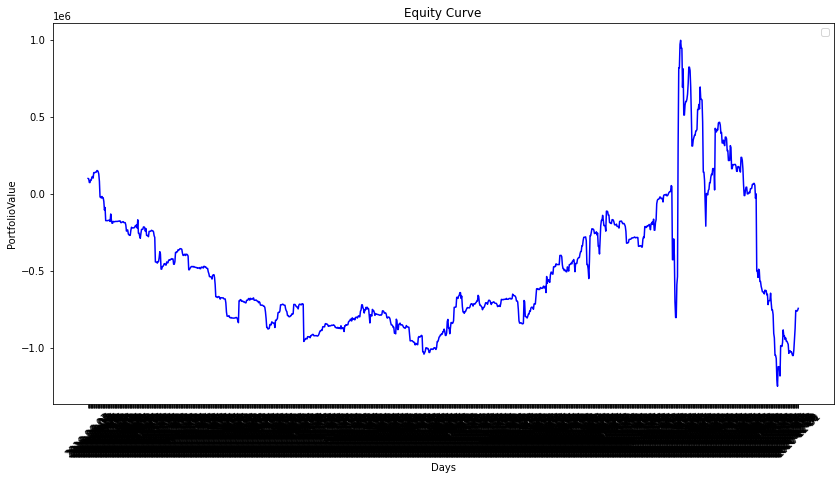

In [60]:
result.to_csv(output_path+"/final4.1.csv")

fig = plt.figure(figsize=(14,7))
plt.title('Equity Curve')
plt.xlabel('Days')
plt.ylabel('PortfolioValue')
plt.plot((result["BANKNIFTY_Date_CE"]).astype('str'),result['PortfolioValue'], c = 'blue')

plt.xticks(rotation=45)

plt.legend()
plt.show()

In [49]:
finallist = pd.DataFrame()
tradelist = result[ (result["D_marker"] == "F") | (result["D_marker"] == "L") ]

if list(tradelist.iloc[[-1]]["D_marker"])[0] == "F":
    tradelist.drop(tradelist.tail(1).index,inplace=True)
else:
    tradelist = tradelist

tr1 = tradelist[tradelist["D_marker"]=="F"].reset_index().drop(columns = ["index"])
tr2 = tradelist[tradelist["D_marker"]=="L"].reset_index().drop(columns = ["index"])

print(tr1.shape[0])
if tr1.shape[0] == tr2.shape[0]:
    for idx in tr1.index:
        mdict = {}
        mdict["Entry_Date"] = tr1[index+ "_Date_CE"][idx]
        mdict["Exit_Date"] = tr2[index+ "_Date_CE"][idx]
        mdict["Trade_Type"] = tr1["Trade_Type"][idx]
        for i in symbols:
            for j in ["CE","PE"]:
                mdict[i + "_Entry_Price_" + j] = tr1[i + "_OPT_Close_" + j][idx] 
                mdict[i + "_Exit_Price_" + j] = tr2[i + "_OPT_Close_" + j][idx]
                mdict[i + "_Qty_" + j] = tr1[i + "_qty_final"][idx]
        temp = pd.DataFrame([mdict])
        #display(temp)
        finallist = finallist.append(temp)
else:
    print("Error, Tradelist not proper")

finallist.reset_index().drop(columns = ["index"])

239


,Entry_Date,Exit_Date,Trade_Type,AXISBANK_Entry_Price_CE,AXISBANK_Exit_Price_CE,AXISBANK_Qty_CE,AXISBANK_Entry_Price_PE,AXISBANK_Exit_Price_PE,AXISBANK_Qty_PE,BANDHANBNK_Entry_Price_CE,...,YESBANK_Qty_CE,YESBANK_Entry_Price_PE,YESBANK_Exit_Price_PE,YESBANK_Qty_PE,BANKNIFTY_Entry_Price_CE,BANKNIFTY_Exit_Price_CE,BANKNIFTY_Qty_CE,BANKNIFTY_Entry_Price_PE,BANKNIFTY_Exit_Price_PE,BANKNIFTY_Qty_PE
0,2016-06-03,2016-06-09,SILS,20.00,16.55,57.003102,15.90,12.90,57.003102,0.00,...,50.279389,5.23,4.90,50.279389,151.05,165.1992,14.158289,195.05,0.0500,14.158289
1,2016-06-10,2016-06-16,SILS,15.25,7.65,64.557381,13.25,21.55,64.557381,0.00,...,56.901302,5.06,4.36,56.901302,146.40,0.0500,16.045260,146.60,155.1504,16.045260
2,2016-06-17,2016-06-23,SILS,12.35,11.35,40.228269,13.50,12.70,40.228269,0.00,...,35.459177,5.72,2.34,35.459177,145.20,199.5508,10.078315,144.45,0.0500,10.078315
3,2016-06-24,2016-06-30,SILS,9.20,23.50,34.050392,8.90,0.05,34.050392,0.00,...,30.052370,3.52,0.05,30.052370,184.40,514.1504,8.550669,195.75,0.0500,8.550669
4,2016-07-01,2016-07-07,SILS,16.85,19.00,125.964294,17.15,14.75,125.964294,0.00,...,111.139838,6.42,6.67,111.139838,137.00,69.1504,31.693962,97.40,0.0500,31.693962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2020-11-27,2020-12-03,SILS,31.50,30.50,375.784974,26.15,23.80,375.784974,20.05,...,0.000000,0.00,0.00,0.000000,447.75,0.0500,88.166756,406.60,151.2500,88.166756
235,2020-12-04,2020-12-10,SILS,30.85,34.50,388.576284,22.50,15.10,388.576284,22.95,...,0.000000,0.00,0.00,0.000000,389.35,410.3496,90.392029,365.30,0.0500,90.392029
236,2020-12-11,2020-12-17,SILS,26.80,17.60,403.206652,22.05,20.85,403.206652,23.65,...,0.000000,0.00,0.00,0.000000,380.60,247.0508,93.945622,396.70,0.0500,93.945622
237,2020-12-18,2020-12-24,SILS,18.00,11.20,412.921360,16.90,9.45,412.921360,15.10,...,0.000000,0.00,0.00,0.000000,354.90,0.0500,96.409534,305.40,297.8008,96.409534


# Adding Expiry Roll OVer Entry Exit

In [50]:
# finallist_exp = pd.DataFrame()
# expirytrades = result[(result[index+ "_Date_CE"] == result[index+ "_curr_exp_date_CE"]) & (result["D_marker"] == "M")]
# #display(expirytrades)
# for idi, row1 in finallist.iterrows():
#     flag = 0
#     for idi, row2 in expirytrades.iterrows():
#         expdate = row2[index+ "_Date_CE"]
#         d1 = row1["Entry_Date"]
#         d2 = row1["Exit_Date"]
#         #print(expdate)
#         #print(d1)
#         #print(d2)
#         if (d1 < expdate < d2) & (flag ==  0):
#             mdict = {}
#             mdict["Expiry_Date"] = expdate
#             for i in symbols:
#                 for j in ["CE","PE"]:
#                     mdict[i + "_Exp_Adj_Entry_Price_" + j] = row2[i + "_Next_Month_Close_" + j]
#                     mdict[i + "_Exp_Adj_Exit_Price_" + j] = row2[i + "_OPT_Close_" + j]
#             temp = pd.DataFrame([mdict])
#             #display(temp)
#             finallist_exp = finallist_exp.append(temp)
#             flag = 1
#     if flag == 0:
#         mdict = {}
#         mdict["Expiry_Date"] = "NA"
#         for i in symbols:
#             for j in ["CE","PE"]:
#                 mdict[i + "_Exp_Adj_Entry_Price_" + j] = 0
#                 mdict[i + "_Exp_Adj_Exit_Price_" + j] = 0
#         temp = pd.DataFrame([mdict])
#         #display(temp)
#         finallist_exp = finallist_exp.append(temp)


# finallist_exp.reset_index().drop(columns = ["index"])

In [51]:
#tradelist =  pd.concat([finallist, finallist_exp], axis=1)

tradelist = finallist

In [52]:
display(tradelist)

,Entry_Date,Exit_Date,Trade_Type,AXISBANK_Entry_Price_CE,AXISBANK_Exit_Price_CE,AXISBANK_Qty_CE,AXISBANK_Entry_Price_PE,AXISBANK_Exit_Price_PE,AXISBANK_Qty_PE,BANDHANBNK_Entry_Price_CE,...,YESBANK_Qty_CE,YESBANK_Entry_Price_PE,YESBANK_Exit_Price_PE,YESBANK_Qty_PE,BANKNIFTY_Entry_Price_CE,BANKNIFTY_Exit_Price_CE,BANKNIFTY_Qty_CE,BANKNIFTY_Entry_Price_PE,BANKNIFTY_Exit_Price_PE,BANKNIFTY_Qty_PE
0,2016-06-03,2016-06-09,SILS,20.00,16.55,57.003102,15.90,12.90,57.003102,0.00,...,50.279389,5.23,4.90,50.279389,151.05,165.1992,14.158289,195.05,0.0500,14.158289
0,2016-06-10,2016-06-16,SILS,15.25,7.65,64.557381,13.25,21.55,64.557381,0.00,...,56.901302,5.06,4.36,56.901302,146.40,0.0500,16.045260,146.60,155.1504,16.045260
0,2016-06-17,2016-06-23,SILS,12.35,11.35,40.228269,13.50,12.70,40.228269,0.00,...,35.459177,5.72,2.34,35.459177,145.20,199.5508,10.078315,144.45,0.0500,10.078315
0,2016-06-24,2016-06-30,SILS,9.20,23.50,34.050392,8.90,0.05,34.050392,0.00,...,30.052370,3.52,0.05,30.052370,184.40,514.1504,8.550669,195.75,0.0500,8.550669
0,2016-07-01,2016-07-07,SILS,16.85,19.00,125.964294,17.15,14.75,125.964294,0.00,...,111.139838,6.42,6.67,111.139838,137.00,69.1504,31.693962,97.40,0.0500,31.693962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020-11-27,2020-12-03,SILS,31.50,30.50,375.784974,26.15,23.80,375.784974,20.05,...,0.000000,0.00,0.00,0.000000,447.75,0.0500,88.166756,406.60,151.2500,88.166756
0,2020-12-04,2020-12-10,SILS,30.85,34.50,388.576284,22.50,15.10,388.576284,22.95,...,0.000000,0.00,0.00,0.000000,389.35,410.3496,90.392029,365.30,0.0500,90.392029
0,2020-12-11,2020-12-17,SILS,26.80,17.60,403.206652,22.05,20.85,403.206652,23.65,...,0.000000,0.00,0.00,0.000000,380.60,247.0508,93.945622,396.70,0.0500,93.945622
0,2020-12-18,2020-12-24,SILS,18.00,11.20,412.921360,16.90,9.45,412.921360,15.10,...,0.000000,0.00,0.00,0.000000,354.90,0.0500,96.409534,305.40,297.8008,96.409534


In [53]:
tradelist.to_csv(output_path+"/trdlist.csv")

In [54]:
#####FOR NEXT MONTH ROLLOVER############

# pl_tradelist = tradelist.copy()
# plvalue = []
# pval = 0
# for idi, row in pl_tradelist.iterrows():

#     if row["Trade_Type"] == "SILS":
#         pvalce = row[index + "_Qty_CE"]*((row[index + "_Entry_Price_CE"] - row[index + "_Exp_Adj_Exit_Price_CE"])+(row[index + "_Exp_Adj_Entry_Price_CE"] - row[index + "_Exit_Price_CE"]))
#         pvalpe = row[index + "_Qty_PE"]*((row[index + "_Entry_Price_PE"] - row[index + "_Exp_Adj_Exit_Price_PE"])+(row[index + "_Exp_Adj_Entry_Price_PE"] - row[index + "_Exit_Price_PE"]))
#         pval = pvalce + pvalpe

#         for i in stock_list:
#             pvalce = row[i + "_Qty_CE"]*((row[i + "_Exp_Adj_Exit_Price_CE"] - row[i + "_Entry_Price_CE"])+(row[i + "_Exit_Price_CE"] - row[i + "_Exp_Adj_Entry_Price_CE"]))
#             pvalpe = row[i + "_Qty_PE"]*((row[i + "_Exp_Adj_Exit_Price_PE"] - row[i + "_Entry_Price_PE"])+(row[i + "_Exit_Price_PE"] - row[i + "_Exp_Adj_Entry_Price_PE"]))
#             pval += pvalce + pvalpe    

#     if row["Trade_Type"] == "LISS":
#         pvalce = row[index + "_Qty_CE"]*((row[index + "_Exp_Adj_Exit_Price_CE"] - row[index + "_Entry_Price_CE"])+(row[index + "_Exit_Price_CE"] - row[index + "_Exp_Adj_Entry_Price_CE"]))
#         pvalpe = row[index + "_Qty_PE"]*((row[index + "_Exp_Adj_Exit_Price_PE"] - row[index + "_Entry_Price_PE"])+(row[index + "_Exit_Price_PE"] - row[index + "_Exp_Adj_Entry_Price_PE"]))
#         pval = pvalce + pvalpe

#         for i in stock_list:
#             pvalce = row[i + "_Qty_CE"]*((row[i + "_Entry_Price_CE"] - row[i + "_Exp_Adj_Exit_Price_CE"])+(row[i + "_Exp_Adj_Entry_Price_CE"] - row[i + "_Exit_Price_CE"]))
#             pvalpe = row[i + "_Qty_PE"]*((row[i + "_Entry_Price_PE"] - row[i + "_Exp_Adj_Exit_Price_PE"])+(row[i + "_Exp_Adj_Entry_Price_PE"] - row[i + "_Exit_Price_PE"]))
#             pval += pvalce + pvalpe    

#     plvalue.append(pval)
                    
# pl_tradelist['pl'] = plvalue
# pl_tradelist.to_csv(output_path+"\pl_trdlist.csv")




In [55]:
pl_tradelist = tradelist.copy()
plvalue = []
pval = 0
for idi, row in pl_tradelist.iterrows():

    if row["Trade_Type"] == "SILS":
        pvalce = row[index + "_Qty_CE"]*(row[index + "_Entry_Price_CE"] - row[index + "_Exit_Price_CE"])
        pvalpe = row[index + "_Qty_PE"]*(row[index + "_Entry_Price_PE"] - row[index + "_Exit_Price_PE"])
        pval = pvalce + pvalpe

        for i in stock_list:
            pvalce = row[i + "_Qty_CE"]*(row[i + "_Exit_Price_CE"] - row[i + "_Entry_Price_CE"])
            pvalpe = row[i + "_Qty_PE"]*(row[i + "_Exit_Price_PE"] - row[i + "_Entry_Price_PE"])
            pval += pvalce + pvalpe    

    if row["Trade_Type"] == "LISS":
        pvalce = row[index + "_Qty_CE"]*(row[index + "_Exit_Price_CE"] - row[index + "_Entry_Price_CE"])
        pvalpe = row[index + "_Qty_PE"]*(row[index + "_Exit_Price_PE"] - row[index + "_Entry_Price_PE"])
        pval = pvalce + pvalpe

        for i in stock_list:
            pvalce = row[i + "_Qty_CE"]*(row[i + "_Entry_Price_CE"] - row[i + "_Exit_Price_CE"])
            pvalpe = row[i + "_Qty_PE"]*(row[i + "_Entry_Price_PE"] - row[i + "_Exit_Price_PE"])
            pval += pvalce + pvalpe    

    plvalue.append(pval)
                    
pl_tradelist['pl'] = plvalue
pl_tradelist.to_csv(output_path+"\pl_trdlist.csv")




In [56]:
### Calculate CAGR 

df = result.copy()
from pyxirr import xirr

firstValue = round(df.loc[0, 'PortfolioValue'],4)
lastValue = round(df.loc[df.index[-1], 'PortfolioValue'],4)

firstDate = (df.loc[0, 'BANKNIFTY_Date_CE'])
lastDate = (df.loc[df.index[-1], 'BANKNIFTY_Date_CE'])

dates = [firstDate, lastDate]
amounts = [-firstValue, lastValue]

xirr = xirr(dates, amounts)

print(xirr)

### Calculate Daily Drawdown

Roll_Max = round(df['PortfolioValue'].expanding().max(), 2)
Daily_Drawdown = (round(df['PortfolioValue'], 2)/Roll_Max) - 1.0


df['Daily_Drawdown'] = Daily_Drawdown * 100

print("max dd", min(df['Daily_Drawdown']))

df.to_csv(output_path + '/DailyDrawdown.csv', index=False)

### Monthly PNL Percentage 

df['BANKNIFTY_Date_CE'] = pd.to_datetime(df['BANKNIFTY_Date_CE'], dayfirst=True)

df['Year'] = pd.DatetimeIndex(df['BANKNIFTY_Date_CE']).year
df['Month'] = pd.DatetimeIndex(df['BANKNIFTY_Date_CE']).month
df.to_csv(output_path + '/df.csv', index=False)

i = 0
dfg = df.groupby(['Year', 'Month'])
for name, group in dfg:
    #print(name)
    if i == 0: 
        firstValue = group['PortfolioValue'].iloc[0]
        i = 1
    else:
        firstValue = lastValue

    lastValue = group['PortfolioValue'].loc[group.index[-1]]
    change = lastValue/firstValue - 1
    df.loc[group.index, 'Change_%_Monthly'] = round(change * 100, 2)
    
i = 0
dfg = df.groupby(['Year'])
for name, group in dfg:
    #print(name)
    if i == 0: 
        firstValue = group['PortfolioValue'].iloc[0]
        i = 1
    else:
        firstValue = lastValue

    lastValue = group['PortfolioValue'].loc[group.index[-1]]
    change = lastValue/firstValue - 1
    df.loc[group.index, 'Change_%_Yearly'] = change * 100
    
df

df1 = df[['Year', 'Month', 'Change_%_Monthly', 'Change_%_Yearly']]
df1 = df1.drop_duplicates()
df1

pivotTable = df1.pivot_table(values ='Change_%_Monthly', index =['Year', 'Change_%_Yearly'],
                         columns =['Month'])
pivotTable.columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                      'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

pivotTable.index

def _color_red_or_green(val):
    color = '#EE0000' if val < 0 else '#00EE00'
    return 'background-color: %s' % color
pivotTable.style.applymap(_color_red_or_green)




0.6057531246223705
max dd -172.3485045562922


,,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,Change_%_Yearly,,,,,,,,,,,,
2016,429.63264030834205,nan,nan,nan,nan,nan,127.720000,68.450000,7.990000,1.380000,-3.300000,52.310000,-14.370000
2017,89.47285677630461,18.340000,-0.190000,30.650000,14.740000,-9.650000,-1.410000,21.550000,-16.080000,-0.440000,28.830000,-5.180000,-3.160000
2018,-15.035795090474691,-0.810000,-5.640000,-1.300000,-1.720000,14.060000,8.290000,6.980000,-6.340000,-9.650000,-13.270000,-2.150000,-1.390000
2019,-47.05917367563316,-2.060000,-3.300000,15.280000,-19.800000,-14.250000,-3.570000,-11.380000,-27.630000,-35.450000,23.460000,38.090000,3.590000
2020,93.92302875720337,-22.030000,-62.780000,-770.680000,-76.890000,-88.740000,1131.150000,-87.270000,-390.620000,500.330000,41.890000,17.760000,-16.170000
